In [31]:
import pandas as pd
import numpy as np 
import re
import string
import nltk

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import pickle

In [5]:
df = pd.read_csv("../input/indonesian-twitter-emotion/Twitter_Emotion_Dataset.csv")

In [6]:
df.shape

(4401, 2)

In [7]:
df.head()

,label,tweet
0,anger,"Soal jln Jatibaru,polisi tdk bs GERTAK gubernu..."
1,anger,"Sesama cewe lho (kayaknya), harusnya bisa lebi..."
2,happy,Kepingin gudeg mbarek Bu hj. Amad Foto dari go...
3,anger,"Jln Jatibaru,bagian dari wilayah Tn Abang.Peng..."
4,happy,"Sharing pengalaman aja, kemarin jam 18.00 bata..."


In [8]:
#emot
df['tweet'] = df['tweet'].str.replace(r"((\\x[a-z0-9]{1,}){1,})", "")
df['tweet'] = df['tweet'].str.replace("USERNAME", "")
#link
#df['tweet'] = df['tweet'].str.replace(r"http\S+", "")
df['tweet'] = df['tweet'].str.replace("URL", "")
#mention
df['tweet'] = df['tweet'].str.replace('@[^\s]+', "")
#hastag
df['tweet'] = df['tweet'].str.replace(r'#([^\s]+)', "")
#baris
df['tweet'] = df['tweet'].str.replace(r"\\n", "")
#Sensitive number, such as phone number, invoice number and courier
df['tweet'] = df['tweet'].str.replace("SENSITIVE-NO", "")

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  if sys.path[0] == "":


In [9]:
#Menghapus tanda baca
df['tweet'] = df['tweet'].str.translate(str.maketrans(string.punctuation, ' '*len(string.punctuation)))
#Menghapus angka
df['tweet'] = df['tweet'].replace(regex='\d+', value='')
#lowercase
df['tweet'] = df['tweet'].str.lower()

In [10]:
#singkatan
df['tweet'] = df['tweet'].str.replace(' adlh ','adalah')
df['tweet'] = df['tweet'].str.replace(' aja ',' saja ')
df['tweet'] = df['tweet'].str.replace(' aj ',' saja ')
df['tweet'] = df['tweet'].str.replace(' ae ',' saja ')
df['tweet'] = df['tweet'].str.replace(' agr ',' agar ')
df['tweet'] = df['tweet'].str.replace(' ampe ',' sampai ')
df['tweet'] = df['tweet'].str.replace(' alhmdllh ',' alhamdulillah ')
df['tweet'] = df['tweet'].str.replace(' amn ',' amin ')
df['tweet'] = df['tweet'].str.replace(' aamiin ',' amin ')
df['tweet'] = df['tweet'].str.replace(' aamiin ',' sama ')
df['tweet'] = df['tweet'].str.replace(' aja ',' saja ')
df['tweet'] = df['tweet'].str.replace(' aq ',' aku ')
df['tweet'] = df['tweet'].str.replace(' ato ',' atau ')
df['tweet'] = df['tweet'].str.replace(' ane ',' aku ')

df['tweet'] = df['tweet'].str.replace(' bs ',' bisa ')
df['tweet'] = df['tweet'].str.replace(' bsa ',' bisa ')
df['tweet'] = df['tweet'].str.replace(' bkn ',' bukan ')
df['tweet'] = df['tweet'].str.replace('bpk','bapak')
df['tweet'] = df['tweet'].str.replace('bkn','bukan')
df['tweet'] = df['tweet'].str.replace('bnyk','banyak')
df['tweet'] = df['tweet'].str.replace(' byk ',' banyak ')
df['tweet'] = df['tweet'].str.replace(' bgt ',' banget ')
df['tweet'] = df['tweet'].str.replace(' bgn ',' bangun ')
df['tweet'] = df['tweet'].str.replace(' bhn ',' bahan ')
df['tweet'] = df['tweet'].str.replace(' bae ',' saja ')
df['tweet'] = df['tweet'].str.replace(' bhay ',' bahaya ')
df['tweet'] = df['tweet'].str.replace(' bri ',' beri ')
df['tweet'] = df['tweet'].str.replace(' brikan ',' berikan ')
df['tweet'] = df['tweet'].str.replace(' breng ',' bareng ')
df['tweet'] = df['tweet'].str.replace(' blg ',' bilang ')
df['tweet'] = df['tweet'].str.replace(' bet ',' banget ')
df['tweet'] = df['tweet'].str.replace(' bett ',' banget ')
df['tweet'] = df['tweet'].str.replace(' blm ',' belum ')
df['tweet'] = df['tweet'].str.replace(' bsok ',' besok ')
df['tweet'] = df['tweet'].str.replace(' btw ',' omong-omong ')
df['tweet'] = df['tweet'].str.replace(' bngt ',' banget ')
df['tweet'] = df['tweet'].str.replace(' bsk ',' besok ')

df['tweet'] = df['tweet'].str.replace(' cb ',' coba ')
df['tweet'] = df['tweet'].str.replace(' cba ',' coba ')
df['tweet'] = df['tweet'].str.replace(' cmn ',' cuman ')
df['tweet'] = df['tweet'].str.replace(' cmn ',' cuma ')
df['tweet'] = df['tweet'].str.replace(' cewe ',' cewek ')

df['tweet'] = df['tweet'].str.replace('dngn','dengan')
df['tweet'] = df['tweet'].str.replace('dgn','dengan')
df['tweet'] = df['tweet'].str.replace(' dg ',' dengan ')
df['tweet'] = df['tweet'].str.replace(' dr ',' dari ')
df['tweet'] = df['tweet'].str.replace(' dri ',' dari ')
df['tweet'] = df['tweet'].str.replace(' d ',' di ')
df['tweet'] = df['tweet'].str.replace(' dlu ',' dulu ')
df['tweet'] = df['tweet'].str.replace(' dl ',' dulu ')
df['tweet'] = df['tweet'].str.replace(' dkit ',' sedikit ')
df['tweet'] = df['tweet'].str.replace(' dpn ',' depan ')
df['tweet'] = df['tweet'].str.replace(' dpny ',' depannya ')
df['tweet'] = df['tweet'].str.replace(' doank ',' doang ')
df['tweet'] = df['tweet'].str.replace(' dtk ',' detik ')
df['tweet'] = df['tweet'].str.replace(' dkt ',' dekat ')
df['tweet'] = df['tweet'].str.replace(' deket ',' dekat ')
df['tweet'] = df['tweet'].str.replace(' dy ',' dia ')
df['tweet'] = df['tweet'].str.replace(' dya ',' dia ')
df['tweet'] = df['tweet'].str.replace(' doi ',' dia ')
df['tweet'] = df['tweet'].str.replace(' dpt ',' dapat ')
df['tweet'] = df['tweet'].str.replace(' dmn ',' dimana ')
df['tweet'] = df['tweet'].str.replace(' dmna ',' dimana ')
df['tweet'] = df['tweet'].str.replace(' dlm ',' dalam ')
df['tweet'] = df['tweet'].str.replace(' drtd ',' dari tadi ')

df['tweet'] = df['tweet'].str.replace('emg','memang')

df['tweet'] = df['tweet'].str.replace(' g ',' gak ')
df['tweet'] = df['tweet'].str.replace(' gk ',' gak ')
df['tweet'] = df['tweet'].str.replace(' gt ',' gitu ')
df['tweet'] = df['tweet'].str.replace(' gtu ',' gitu ')
df['tweet'] = df['tweet'].str.replace(' gn ',' gini ')
df['tweet'] = df['tweet'].str.replace(' gmn ',' bagaimana ')
df['tweet'] = df['tweet'].str.replace(' gmna ',' gimana ')
df['tweet'] = df['tweet'].str.replace(' gaada ',' tidak ada ')
df['tweet'] = df['tweet'].str.replace(' gada ',' tidak ada ')
df['tweet'] = df['tweet'].str.replace(' gamau ',' tidak mau ')
df['tweet'] = df['tweet'].str.replace(' gausah ',' gak usah ')
df['tweet'] = df['tweet'].str.replace(' gabisa ',' gak bisa ')
df['tweet'] = df['tweet'].str.replace(' goblog ',' goblok ')
df['tweet'] = df['tweet'].str.replace(' gua ',' aku ')
df['tweet'] = df['tweet'].str.replace(' gue ',' aku ')
df['tweet'] = df['tweet'].str.replace(' gw ',' aku ')
df['tweet'] = df['tweet'].str.replace(' gwe ',' aku ')
df['tweet'] = df['tweet'].str.replace(' gak ',' tidak ')
df['tweet'] = df['tweet'].str.replace(' ga ',' tidak ')
df['tweet'] = df['tweet'].str.replace(' gpp ',' tidak apa apa ')

df['tweet'] = df['tweet'].str.replace(' hny ',' hanya ')
df['tweet'] = df['tweet'].str.replace(' hrs ',' harus ')
df['tweet'] = df['tweet'].str.replace(' hepi ',' happy ')

df['tweet'] = df['tweet'].str.replace(' ilang ',' hilang ')

df['tweet'] = df['tweet'].str.replace('jwb','jawab')
df['tweet'] = df['tweet'].str.replace('jln','jalan')
df['tweet'] = df['tweet'].str.replace('jgn','jangan')
df['tweet'] = df['tweet'].str.replace('jngn','jangan')
df['tweet'] = df['tweet'].str.replace(' jga ',' juga ')
df['tweet'] = df['tweet'].str.replace(' jg ',' juga ')
df['tweet'] = df['tweet'].str.replace(' jmpt ',' jemput ')
df['tweet'] = df['tweet'].str.replace('jdi ','jadi ')
df['tweet'] = df['tweet'].str.replace(' jd ',' jadi ')
df['tweet'] = df['tweet'].str.replace(' jbtn ',' jabatan ')
df['tweet'] = df['tweet'].str.replace(' jjur ',' jujur ')

df['tweet'] = df['tweet'].str.replace(' kmrn ',' kemarin ')
df['tweet'] = df['tweet'].str.replace(' kmrin ',' kemarin ')
df['tweet'] = df['tweet'].str.replace(' kalo ',' kalau ')
df['tweet'] = df['tweet'].str.replace(' klau ',' kalau ')
df['tweet'] = df['tweet'].str.replace(' krn ',' karena ')
df['tweet'] = df['tweet'].str.replace( 'karna ',' karena ')
df['tweet'] = df['tweet'].str.replace(' km ',' kamu ')
df['tweet'] = df['tweet'].str.replace(' knp ',' kenapa ')
df['tweet'] = df['tweet'].str.replace(' knpa ',' kenapa ')
df['tweet'] = df['tweet'].str.replace(' kls ',' kelas ')
df['tweet'] = df['tweet'].str.replace(' kpd ',' kepada ')
df['tweet'] = df['tweet'].str.replace(' klmpok ',' kelompok ')
df['tweet'] = df['tweet'].str.replace(' kl ',' kalau ')
df['tweet'] = df['tweet'].str.replace(' klo ',' kalau ')
df['tweet'] = df['tweet'].str.replace(' klw ',' kalau ')
df['tweet'] = df['tweet'].str.replace(' knl ',' kenal ')
df['tweet'] = df['tweet'].str.replace(' kemna ',' kemana ') 
df['tweet'] = df['tweet'].str.replace(' kaga ',' tidak ')
df['tweet'] = df['tweet'].str.replace(' kek ',' kayak ')
df['tweet'] = df['tweet'].str.replace(' kayak ',' seperti ')
df['tweet'] = df['tweet'].str.replace(' kepo ',' penasaran ')
df['tweet'] = df['tweet'].str.replace(' kcelakan ',' kecelakaan ')
df['tweet'] = df['tweet'].str.replace(' ktmu ',' ketemu ')

df['tweet'] = df['tweet'].str.replace('lgsg','langsung')
df['tweet'] = df['tweet'].str.replace('lsg','langsung')
df['tweet'] = df['tweet'].str.replace(' lg ',' lagi ')
df['tweet'] = df['tweet'].str.replace(' lgi ',' lagi ')
df['tweet'] = df['tweet'].str.replace(' lbh ',' lebih ')
df['tweet'] = df['tweet'].str.replace(' lma ',' lama ')
df['tweet'] = df['tweet'].str.replace(' loe ',' lo ')
df['tweet'] = df['tweet'].str.replace(' lo ',' kamu ')
df['tweet'] = df['tweet'].str.replace(' lu ',' kamu ')
df['tweet'] = df['tweet'].str.replace(' liat ',' lihat ')

df['tweet'] = df['tweet'].str.replace(' mrk ',' mereka ')
#df['tweet'] = df['tweet'].str.replace(' mn ','men')
df['tweet'] = df['tweet'].str.replace(' msh ','masih ')
df['tweet'] = df['tweet'].str.replace(' mo ',' mau ')
df['tweet'] = df['tweet'].str.replace(' mao ',' mau ')
df['tweet'] = df['tweet'].str.replace(' mwu ',' mau ')
df['tweet'] = df['tweet'].str.replace(' mw ',' mau ')
df['tweet'] = df['tweet'].str.replace(' mhn ',' mohon ')
df['tweet'] = df['tweet'].str.replace(' mrasa ',' merasa ')
df['tweet'] = df['tweet'].str.replace(' moga ',' semoga ')
df['tweet'] = df['tweet'].str.replace(' mga ',' semoga ')
df['tweet'] = df['tweet'].str.replace(' mski ',' meski ')
df['tweet'] = df['tweet'].str.replace(' mgkn ',' mungkin ')
df['tweet'] = df['tweet'].str.replace(' masi ',' masih ')
df['tweet'] = df['tweet'].str.replace(' mmg ',' memang ')
df['tweet'] = df['tweet'].str.replace(' mkn ',' makan ')
df['tweet'] = df['tweet'].str.replace(' mnum ',' minum ')

df['tweet'] = df['tweet'].str.replace('ny ','nya ')
df['tweet'] = df['tweet'].str.replace(' n ',' dan ')
df['tweet'] = df['tweet'].str.replace(' nggak ',' tidak ')
df['tweet'] = df['tweet'].str.replace(' nnti ',' nanti ')
df['tweet'] = df['tweet'].str.replace(' ntr ',' nanti ')

df['tweet'] = df['tweet'].str.replace('org','orang')

df['tweet'] = df['tweet'].str.replace('plg','pulang')
df['tweet'] = df['tweet'].str.replace(' pdhl ',' padahal ')
df['tweet'] = df['tweet'].str.replace(' pdhal ',' padahal ')
df['tweet'] = df['tweet'].str.replace(' pgi ',' pagi ')
df['tweet'] = df['tweet'].str.replace(' pgn ',' ingin ')
df['tweet'] = df['tweet'].str.replace(' pengen ',' ingin ')
df['tweet'] = df['tweet'].str.replace(' pda ',' pada ')
df['tweet'] = df['tweet'].str.replace(' pd ',' pada ')
df['tweet'] = df['tweet'].str.replace(' pcar ',' pacar ')
df['tweet'] = df['tweet'].str.replace(' pdnya ',' padanya ')

df['tweet'] = df['tweet'].str.replace(' rspnnya ',' responnya ')
df['tweet'] = df['tweet'].str.replace(' rspn ',' respon ')

df['tweet'] = df['tweet'].str.replace(' sdh ',' sudah ')
df['tweet'] = df['tweet'].str.replace(' sdah ',' sudah ')
df['tweet'] = df['tweet'].str.replace('skrg','sekarang')
df['tweet'] = df['tweet'].str.replace(' sbab ',' sebab ')
df['tweet'] = df['tweet'].str.replace(' sbbnya ',' sebabnya ')
df['tweet'] = df['tweet'].str.replace('smua','semua')
df['tweet'] = df['tweet'].str.replace(' sm ',' sama ')
df['tweet'] = df['tweet'].str.replace(' sj ',' saja ')
df['tweet'] = df['tweet'].str.replace(' sy ',' saya ')
df['tweet'] = df['tweet'].str.replace(' sedng ',' sedang ')
df['tweet'] = df['tweet'].str.replace(' sdg ',' sedang ')
df['tweet'] = df['tweet'].str.replace(' sampe ',' sampai ')
df['tweet'] = df['tweet'].str.replace(' mpe ',' sampai ')
df['tweet'] = df['tweet'].str.replace(' sampe2 ',' sampai sampai ')
df['tweet'] = df['tweet'].str.replace(' smpe ',' sampai ')
df['tweet'] = df['tweet'].str.replace(' syg ',' sayang ')
df['tweet'] = df['tweet'].str.replace(' smg ',' semoga ')
df['tweet'] = df['tweet'].str.replace(' sbg ',' sebagai ')
df['tweet'] = df['tweet'].str.replace(' ssuai ',' sesuai ')
df['tweet'] = df['tweet'].str.replace(' scr ',' secara ')
df['tweet'] = df['tweet'].str.replace(' skli ',' sekali ')
df['tweet'] = df['tweet'].str.replace(' sblmnya ',' sebelumnya ')
df['tweet'] = df['tweet'].str.replace(' soalx ',' soalnya ')
df['tweet'] = df['tweet'].str.replace(' skrg ',' sekarang ')
df['tweet'] = df['tweet'].str.replace(' slmat ',' selamat ')
df['tweet'] = df['tweet'].str.replace(' sbb ',' sebab ')
df['tweet'] = df['tweet'].str.replace(' sna ',' sana ')
df['tweet'] = df['tweet'].str.replace(' smsm ',' sama sama ')
df['tweet'] = df['tweet'].str.replace(' sodara ',' saudara ')

df['tweet'] = df['tweet'].str.replace(' tdk ',' tidak ')
df['tweet'] = df['tweet'].str.replace(' tak ',' tidak ')
df['tweet'] = df['tweet'].str.replace(' tdj ',' tidak ')
df['tweet'] = df['tweet'].str.replace(' trs ',' terus ')
df['tweet'] = df['tweet'].str.replace(' trus ',' terus ')
df['tweet'] = df['tweet'].str.replace(' ttp ',' tetap ')
df['tweet'] = df['tweet'].str.replace(' ttep ',' tetap ')
df['tweet'] = df['tweet'].str.replace(' td ',' tadi ')
df['tweet'] = df['tweet'].str.replace(' tp ',' tapi ')
df['tweet'] = df['tweet'].str.replace(' tpi ',' tapi ')
df['tweet'] = df['tweet'].str.replace(' tmbh ',' tambah ')
df['tweet'] = df['tweet'].str.replace(' tmbah ',' tambah ')
df['tweet'] = df['tweet'].str.replace(' thn ',' tahun ')
df['tweet'] = df['tweet'].str.replace(' Tn ',' tanah ')
df['tweet'] = df['tweet'].str.replace(' tgg ',' tanggung ')
df['tweet'] = df['tweet'].str.replace(' tgl ',' tanggal ')
df['tweet'] = df['tweet'].str.replace(' tdr ',' tidur ')
df['tweet'] = df['tweet'].str.replace(' twt ',' tweet ')
df['tweet'] = df['tweet'].str.replace(' tlong ',' tolong ')
df['tweet'] = df['tweet'].str.replace(' trmasuk ',' termasuk ')
df['tweet'] = df['tweet'].str.replace(' tlp ',' telpon ')
df['tweet'] = df['tweet'].str.replace(' tbtb ',' tiba tiba ')
df['tweet'] = df['tweet'].str.replace(' tmn ',' teman ')
df['tweet'] = df['tweet'].str.replace(' trnyata ',' ternyata ')
df['tweet'] = df['tweet'].str.replace(' tgh ',' tengah ')
df['tweet'] = df['tweet'].str.replace(' tkut ',' takut ')

df['tweet'] = df['tweet'].str.replace(' utk ',' untuk ')
df['tweet'] = df['tweet'].str.replace(' udh ',' sudah ')
df['tweet'] = df['tweet'].str.replace(' uda ',' sudah ')
df['tweet'] = df['tweet'].str.replace(' udeh ',' sudah ')

df['tweet'] = df['tweet'].str.replace('wwnang','wewenang')
df['tweet'] = df['tweet'].str.replace(' wkt',' waktu ')
df['tweet'] = df['tweet'].str.replace(' wlpn ',' walaupun ')
df['tweet'] = df['tweet'].str.replace(' w ',' aku ')

df['tweet'] = df['tweet'].str.replace(' yg ',' yang ')
df['tweet'] = df['tweet'].str.replace(' yudhlh ',' ya sudahlah ')
df['tweet'] = df['tweet'].str.replace(' yh ',' ya ')

df['tweet'] = df['tweet'].str.replace(' [a-zA-Z]{1} ', " ")

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:258: FutureWarning: The default value of regex will change from True to False in a future version.


In [11]:
df.to_csv("tweetclean.csv", index=False)

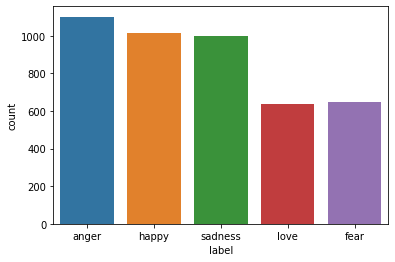

In [12]:
sns.countplot(data=df, x="label", label="Count")
plt.show()

In [13]:
df

,label,tweet
0,anger,soal jalan jatibaru polisi tidak bisa gertak g...
1,anger,sesama cewek lho kayaknya harusnya bisa leb...
2,happy,kepingin gudeg mbarek bu hj amad foto dari go...
3,anger,jalan jatibaru bagian dari wilayah tn abang pe...
4,happy,sharing pengalaman saja kemarin jam batalin...
...,...,...
4396,love,tahukah kamu bahwa saat itu papa memejamkan m...
4397,fear,sulitnya menetapkan calon wapresnya jokowi di ...
4398,anger,masa depannya tidak jelas lha iya gimana m...
4399,happy,dulu beneran ada mahasiswa teknik ui nembak...


In [14]:
d = {'anger':'Tweet Buzzer', 'happy':'Bukan Buzzer', 'sadness':'Tweet Buzzer', 'love':'Bukan Buzzer', 
     'fear':'Tweet Buzzer'}
y = df['label'].map(d)

In [15]:
y

0       Tweet Buzzer
1       Tweet Buzzer
2       Bukan Buzzer
3       Tweet Buzzer
4       Bukan Buzzer
            ...     
4396    Bukan Buzzer
4397    Tweet Buzzer
4398    Tweet Buzzer
4399    Bukan Buzzer
4400    Tweet Buzzer
Name: label, Length: 4401, dtype: object

In [16]:
text = df['tweet']
count_vect = CountVectorizer()
X_count = count_vect.fit_transform(text)

tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X_count)

In [17]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_tfidf, y)

LogisticRegression()

In [18]:
from sklearn.model_selection import cross_val_predict
predLR = cross_val_predict(estimator = classifier, X = X_tfidf, y = y, cv = 10)

In [19]:
from sklearn.metrics import confusion_matrix
conf_mat2 = confusion_matrix(y, predLR)
conf_mat2

array([[ 892,  762],
       [ 120, 2627]])

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y, predLR))

              precision    recall  f1-score   support

Bukan Buzzer       0.88      0.54      0.67      1654
Tweet Buzzer       0.78      0.96      0.86      2747

    accuracy                           0.80      4401
   macro avg       0.83      0.75      0.76      4401
weighted avg       0.82      0.80      0.79      4401



In [21]:
countVectfile = "countVectLR"  

with open(countVectfile, 'wb') as file:  
    pickle.dump(count_vect, file)

In [22]:
tfidffile = "tfidfLR"  

with open(tfidffile, 'wb') as file:  
    pickle.dump(tfidf_transformer, file)

In [23]:
Pkl_Filename = "LR_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(classifier, file)

In [24]:
sentence = input('Masukkan Kalimat:') 

Masukkan Kalimat: pak anis ini orang baik


In [25]:
text_new =[sentence]
X_new_counts = count_vect.transform(text_new)
X_new_tfidf = tfidf_transformer.transform(X_new_counts)

In [26]:
file = "./LR_Model.pkl"

In [27]:
with open(file, 'rb') as file:
    classifierLR = pickle.load(file)

In [28]:
classifierLR.predict(X_new_tfidf)

array(['Tweet Buzzer'], dtype=object)